In [25]:
# Install necessary libraries
!pip install pandas numpy scikit-learn

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Load the Walmart sales dataset
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [27]:
# Replace 'train.csv' with the name of your uploaded file if different
data = pd.read_csv('train.csv')

In [28]:
# Display the first few rows of the dataset
print(data.head())

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False


In [31]:
# Preprocessing
data['date'] = pd.to_datetime(data['Date'])  # Convert date to datetime format
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['price'] = data['Weekly_Sales'] / data['Store']  # Simplified price calculation
data['competitor_price'] = np.random.uniform(10, 50, size=len(data))  # Simulated competitor price

In [32]:
# Feature engineering: lagged price
data['price_lag_1'] = data['price'].shift(1)
data.dropna(inplace=True)

# Define features and target
features = ['price_lag_1', 'price', 'competitor_price', 'year', 'month']
target = 'Weekly_Sales'

# Split the data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Define features and target
features = ['price', 'competitor_price', 'year', 'month']
target = 'Weekly_Sales'

# Split the data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

In [35]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
rae = np.sum(np.abs(y_test - predictions)) / np.sum(np.abs(y_test - np.mean(y_test)))  # Relative Absolute Error
rse = np.sqrt(np.sum((y_test - predictions) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))  # Root Relative Squared Error

In [36]:
# Print the evaluation metrics
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Relative Absolute Error: {rae}')
print(f'Root Relative Squared Error: {rse}')

Mean Absolute Error: 8246.061423346064
Root Mean Squared Error: 15765.282465338303
Relative Absolute Error: 0.5491300072422981
Root Relative Squared Error: 0.703549154554642


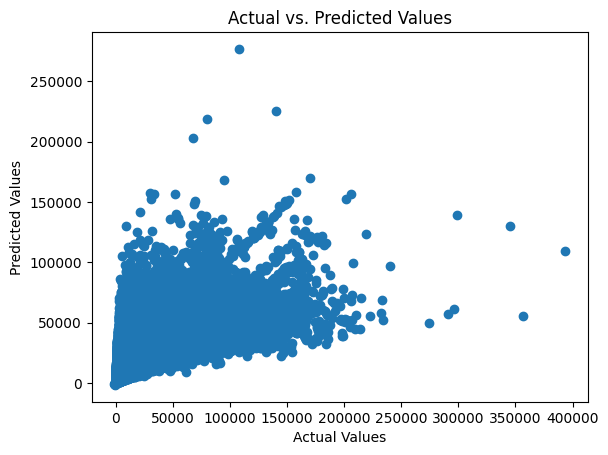

R-squared: 0.5050185871254484


In [37]:
# Assuming you have y_test and predictions available

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Calculate R-squared
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, predictions)
print(f"R-squared: {r_squared}")

In [54]:
# Convert predictions to classes
threshold = np.mean(y_test)
predicted_classes = (predictions > threshold).astype(int)
actual_classes = (y_test > threshold).astype(int)


#Calculate accuracy
accuracy = accuracy_score(actual_classes, predicted_classes)
print(f"Accuracy: {accuracy}")

#Classification Report
class_report = classification_report(actual_classes, predicted_classes)
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8467395687548924
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88     58068
           1       0.72      0.84      0.77     26246

    accuracy                           0.85     84314
   macro avg       0.82      0.84      0.83     84314
weighted avg       0.86      0.85      0.85     84314



In [53]:
# Define sales thresholds for categorization
bins = [0, 10000, 50000, np.inf]  # Example thresholds
labels = ['Low Sales', 'Medium Sales', 'High Sales']

# Convert predictions to categories
predicted_categories = pd.cut(predictions, bins=bins, labels=labels)

# Convert y_test to categories (if it's not already in categories).
# If y_test is already categorical, skip this.
y_test_categories = pd.cut(y_test, bins=bins, labels=labels)

# Convert categories to numerical codes before calculating the confusion matrix
# This ensures that the confusion_matrix function receives numerical inputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test_categories)
predicted_encoded = le.transform(predicted_categories)

# Calculate and display the confusion matrix
cm = confusion_matrix(y_test_encoded, predicted_encoded)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 2224     1  4161     0]
 [  341 38802  8661     0]
 [ 2225  3556 24064     0]
 [    0     0     0   279]]


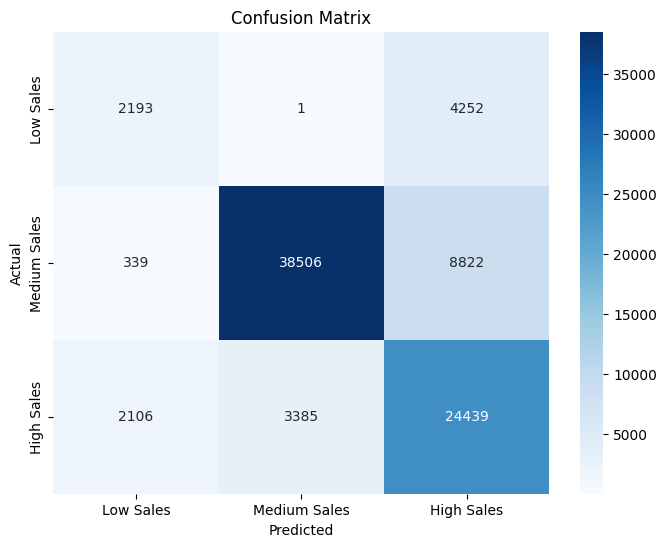

In [39]:
# You can also visualize the confusion matrix:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

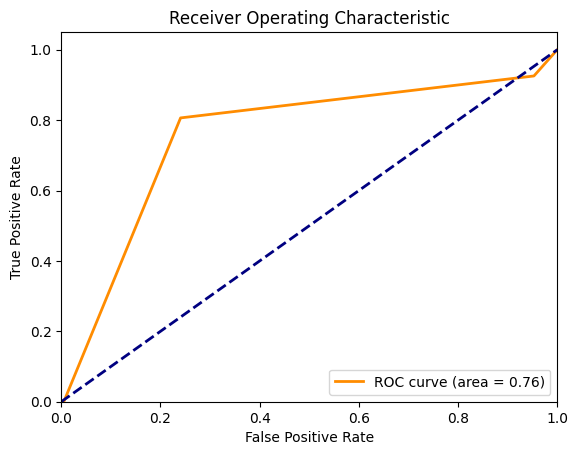

In [42]:
from sklearn.metrics import roc_curve, auc
# Convert categories to numerical labels for ROC curve calculation
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test_categories)
predicted_encoded = le.transform(predicted_categories)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, predicted_encoded, pos_label=2) # Assuming 'High Sales' is the positive class
roc_auc = auc(fpr, tpr)


# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [45]:
# PRC Area:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Reshape predicted_encoded to a 2D array
predicted_encoded_2d = predicted_encoded.reshape(-1, 1)  # Reshape to a single column

precision, recall, thresholds_prc = precision_recall_curve(y_test_encoded, predicted_encoded_2d, pos_label=2)
prc_auc = average_precision_score(y_test_encoded, predicted_encoded_2d)

print(f"PRC Area: {prc_auc}")

# FP Rate and TP Rate: (already calculated as fpr and tpr in the ROC curve section)
print(f"False Positive Rate (at various thresholds):\n{fpr}")
print(f"True Positive Rate (at various thresholds):\n{tpr}")

PRC Area: 0.09933697396538754
False Positive Rate (at various thresholds):
[0.         0.00512218 0.24052213 0.95290899 1.        ]
True Positive Rate (at various thresholds):
[0.         0.         0.80629921 0.92544815 1.        ]


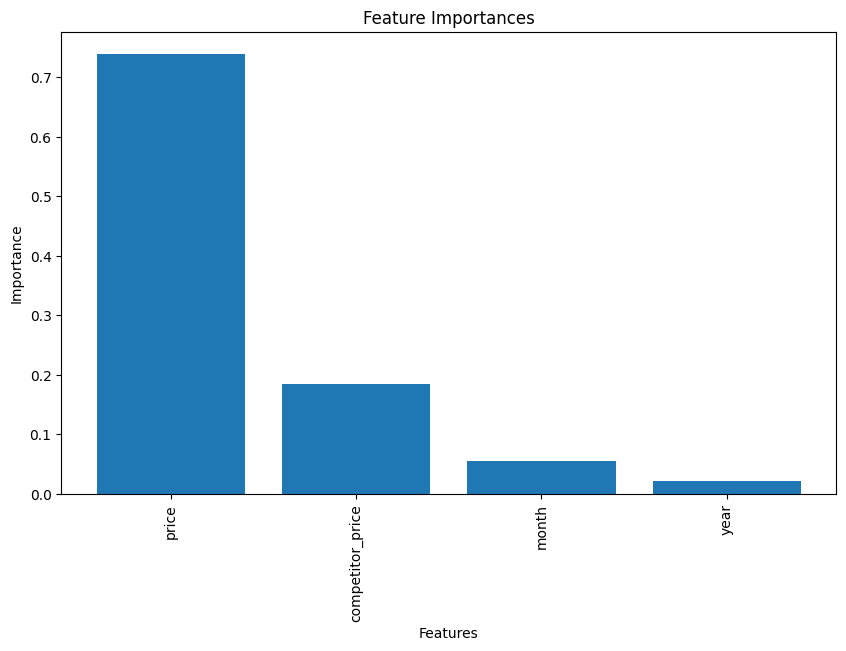

In [56]:
# Feature Importance Plot
importances = model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

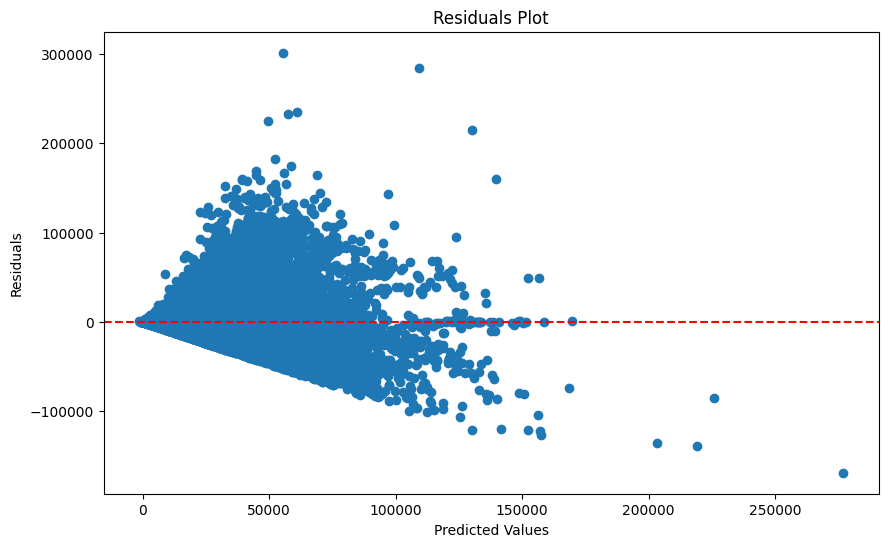

In [57]:
# Residuals Plot
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

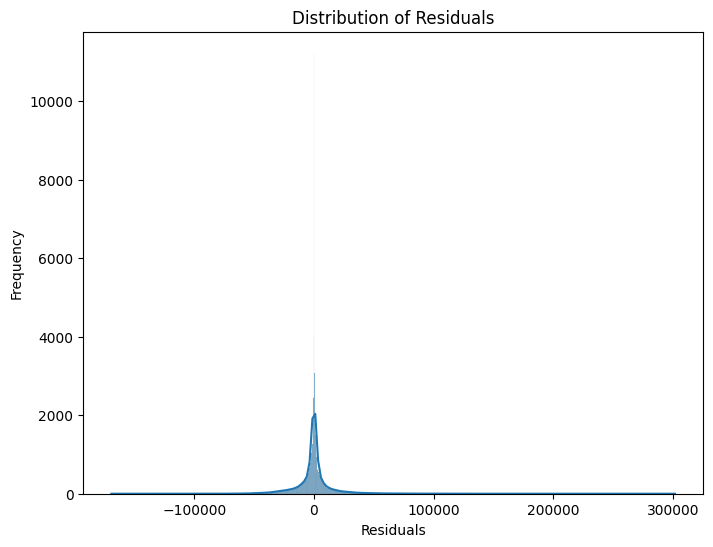

In [58]:
# Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

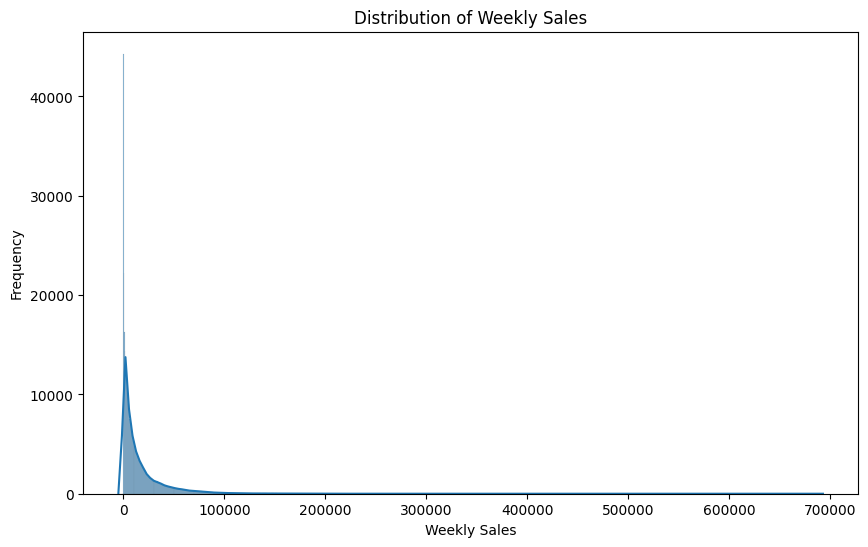

In [59]:
# Distribution of Weekly Sales
plt.figure(figsize=(10, 6))
sns.histplot(data['Weekly_Sales'], kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

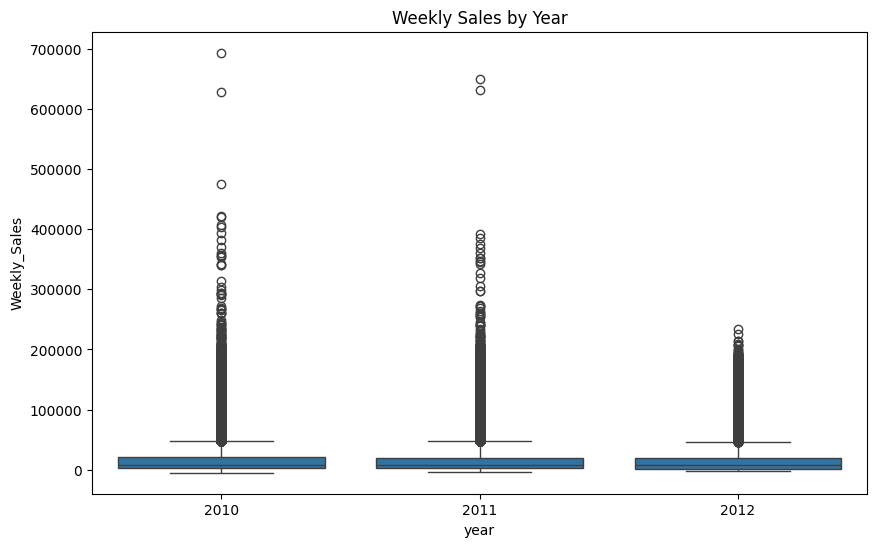

In [60]:
# Boxplot of Weekly Sales by Year
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='Weekly_Sales', data=data)
plt.title('Weekly Sales by Year')
plt.show()

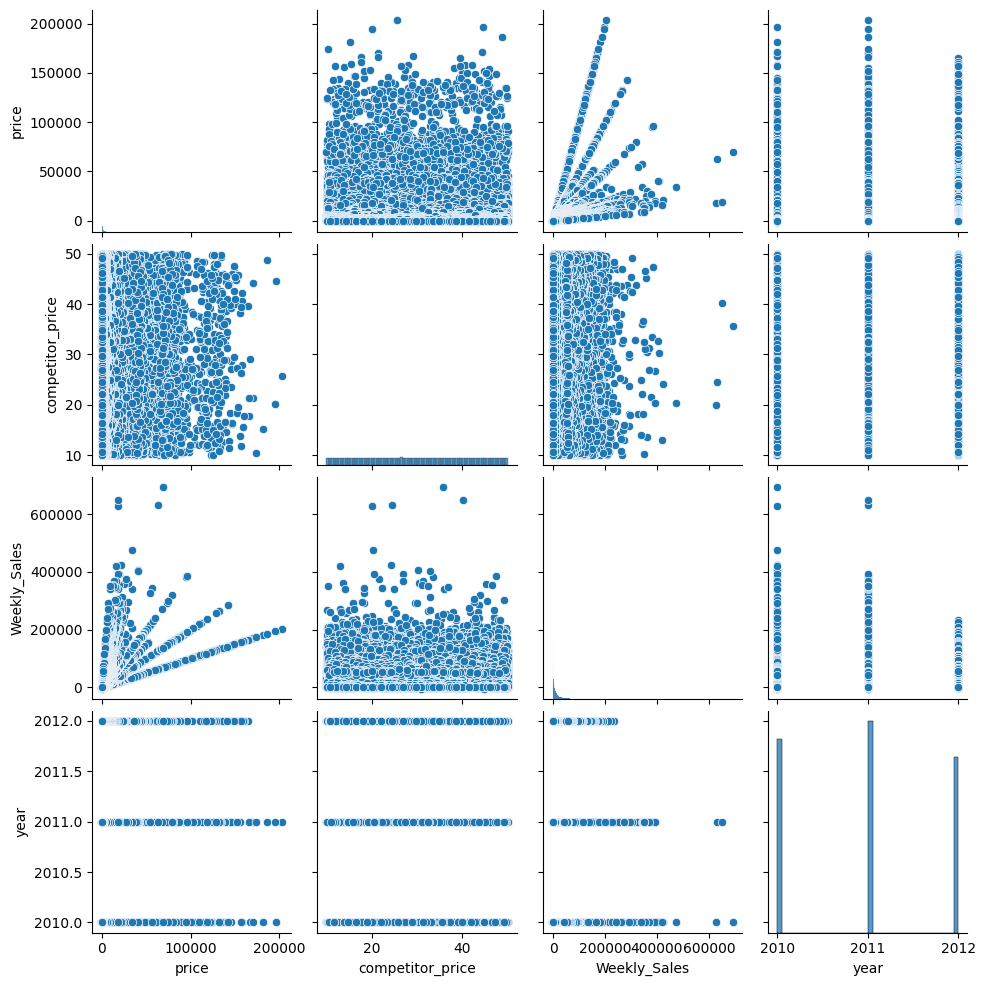

In [61]:
# Pairplot of selected features
sns.pairplot(data[['price', 'competitor_price', 'Weekly_Sales', 'year']])
plt.show()

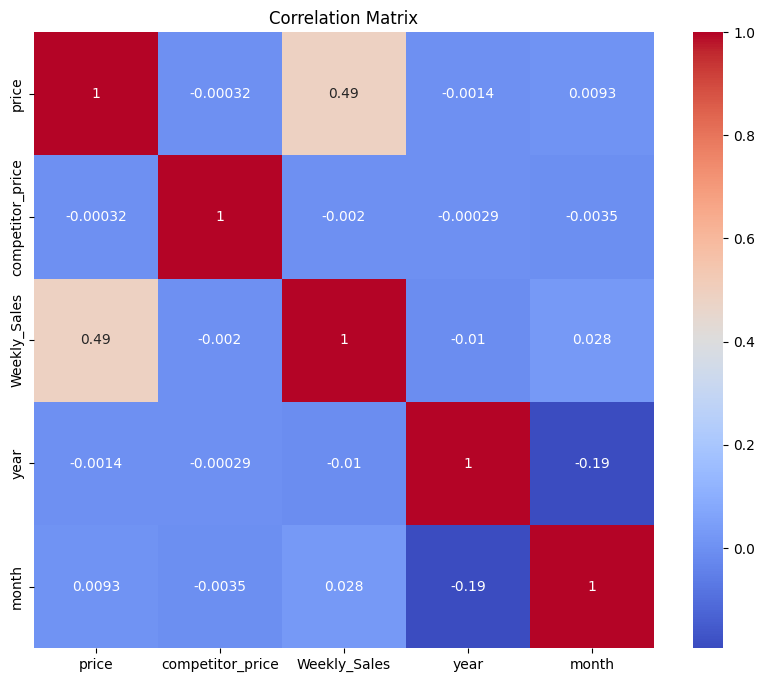

In [62]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data[['price', 'competitor_price', 'Weekly_Sales', 'year', 'month']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()